One way to achieve this is by OVER-sampling, which is adding copies of the under-represented class (better when you have little data)

Another is UNDER-sampling, which deletes instances from the over-represented class (better when he have lot's of data)

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [114]:
data = pd.read_csv("./creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [115]:
# count_classes = pd.value_counts(data['Class'], sort = True).sort_index()
# count_classes.plot(kind = 'bar')
# plt.title("Fraud class histogram")
# plt.xlabel("Class")
# plt.ylabel("Frequency")

In [116]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [117]:
# data.loc[:, ['Time', 'Amount']].describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

In [118]:
# plt.figure(figsize=(10,8))
# plt.title('Distribution of Time Feature')
# sns.distplot(data.Time)

In [119]:
# plt.figure(figsize=(10,8))
# plt.title('Distribution of Time Feature')
# sns.distplot(data.Amount)

In [120]:
df_fraud = data[data["Class"] == 1]
df_no_fraud = data[data["Class"] == 0]

# number of frauds
number_of_frauds = df_fraud.shape[0]
print("number of frauds:", number_of_frauds)

df_no_fraud_reducted = df_no_fraud.sample(number_of_frauds)
print("new dataset with no frauds:", df_no_fraud_reducted.shape[0])

# merge
df = pd.concat([df_no_fraud_reducted, df_fraud])
print("new shape", df.shape[0])

number of frauds: 492
new dataset with no frauds: 492
new shape 984


In [121]:
# new_counts = df.Class.value_counts()
# plt.figure(figsize=(8,6))
# sns.barplot(x=new_counts.index, y=new_counts)
# plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
# plt.ylabel('Frequency')
# plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [122]:
df_std = df.copy()

# standardize features
features = ["Time","Amount"]
to_std = df_std[features]
df_std[features] = (to_std - to_std.mean())/to_std.std()

df_std = df_std.sample(frac=1).reset_index(drop=True)
df_std.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.014267,-0.079653,3.222010,-3.724201,6.037345,0.583395,-0.691346,-1.799885,-2.627781,-4.001338,...,-0.664694,1.138556,-0.350753,-0.287467,0.808889,0.823962,0.668497,0.595610,-0.440072,1
1,0.992464,1.176633,3.141918,-6.140445,5.521821,1.768515,-1.727186,-0.932429,0.292797,-3.156827,...,0.129372,-0.803021,-0.074098,-0.031084,0.375366,0.065897,0.488258,0.325872,-0.444496,1
2,-0.401289,-0.758469,-0.045410,-0.168438,-1.313275,-1.901763,0.739433,3.071892,-0.483422,0.618203,...,0.042619,0.397224,0.072229,-0.242276,0.560916,-0.540955,0.150606,-0.117140,1.984462,1
3,-0.692932,-1.649279,1.263974,-1.050826,2.237991,-2.527889,-0.889940,-2.355254,0.854659,-1.281243,...,0.679176,0.731907,0.333045,0.392505,-0.274197,0.802349,0.390809,0.112146,0.052966,1
4,1.390029,1.971896,0.919439,-2.667238,1.566924,1.177384,-1.119125,0.452769,-0.245634,-0.283806,...,0.105483,0.491101,-0.124260,-0.674679,0.351103,-0.422144,0.051277,0.016972,-0.417687,0


In [123]:
from sklearn.manifold import TSNE

# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1

# df_std = df_std[~((df_std < (Q1 - 2.5 * IQR)) |(df_std > (Q3 + 2.5 * IQR))).any(axis=1)]
# print(str(df_std.shape[0]))

X = df_std.drop('Class', axis=1)
y = df_std['Class']

X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

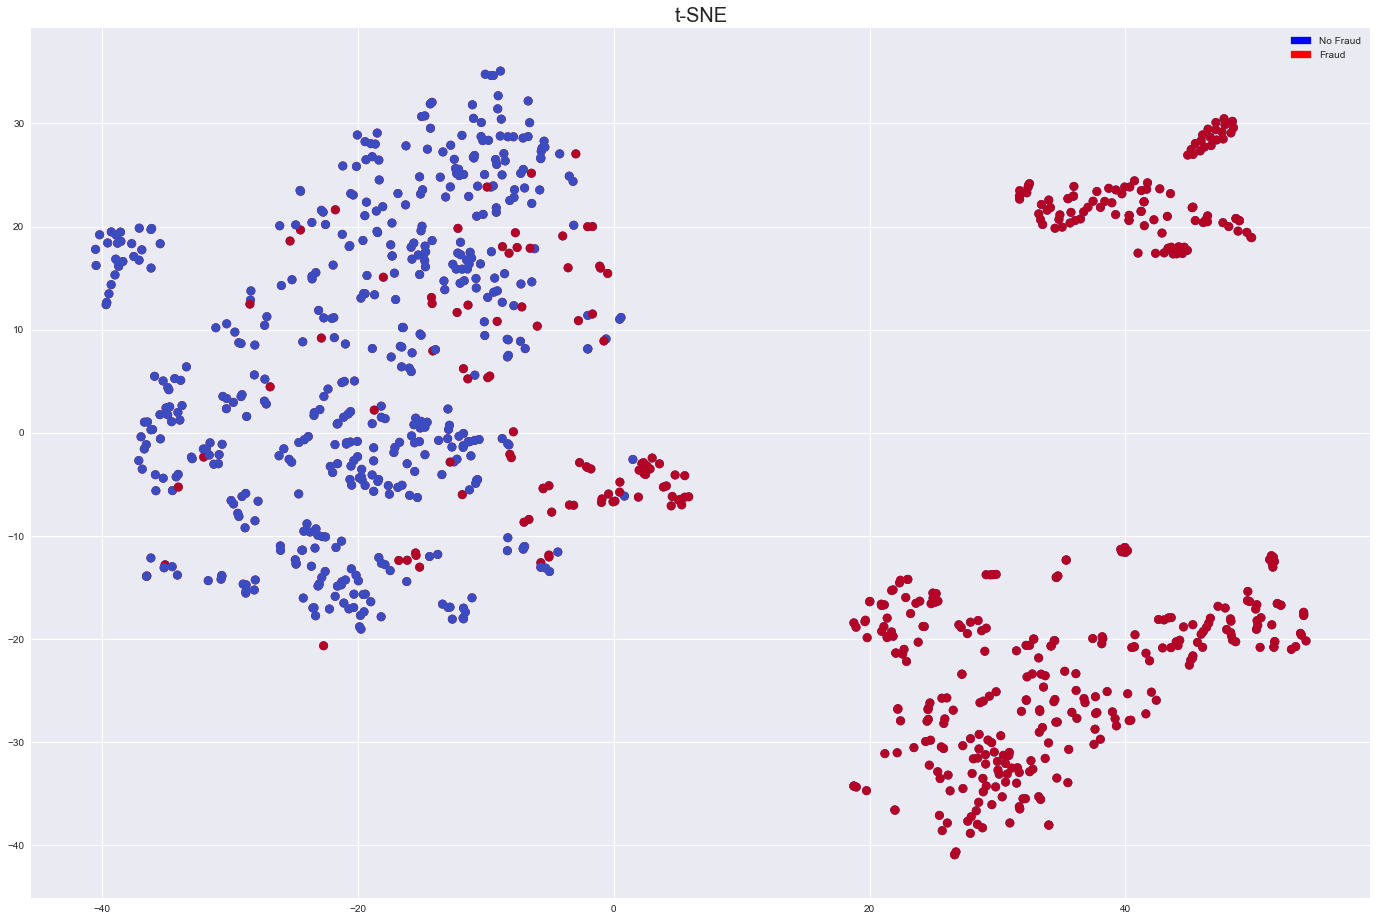

In [124]:
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))

blue_patch = mpatches.Patch(color='blue', label='No Fraud')
red_patch = mpatches.Patch(color='red', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=20)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

In [125]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [126]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
#from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

In [127]:
forest = RandomForestClassifier(n_estimators=20, random_state=42, min_samples_leaf=3, n_jobs=-1)

forest.fit(X_train, y_train)

y_pred_train = forest.predict(X_train)
y_pred = forest.predict(X_test)

y_pred_prob3 = forest.predict_proba(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

print("ACCURACY: TRAIN=%.4f TEST=%.4f" % (accuracy_train,accuracy_test))
print("LOG LOSS: "+str(log_loss(y_test, y_pred_prob3)))

ACCURACY: TRAIN=0.9771 TEST=0.9492
LOG LOSS: 0.29526181389618733


In [128]:
# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# predict probabilities
y_pred_prob1 = model1.predict_proba(X_test)
y_pred_prob2 = model2.predict_proba(X_test)
#y_pred_prob3

/Users/danielesalerno/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [129]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, y_pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, y_pred_prob3[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [130]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, y_pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, y_pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, y_pred_prob3[:,1])

print(auc_score1, auc_score2, auc_score3)

0.9709278350515462 0.976237113402062 0.9844329896907217


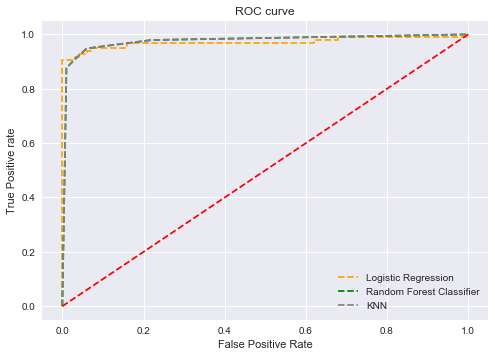

In [131]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random Forest Classifier')
plt.plot(fpr2, tpr2, linestyle='--',color='grey', label='KNN')

plt.plot(p_fpr, p_tpr, linestyle='--', color='red')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();